<a href="https://colab.research.google.com/github/dear-elia/arctic-epidemiology/blob/main/research_papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/data_analysis_dataset/research_papers.csv'

df = pd.read_csv(file_path, quotechar='"', on_bad_lines='skip')
df

,title,reserch_desc,author
0,‘유람시아(Euramsia:Europe-America-Asia)’의 꿈 －베링해협 ...,본 연구는 베링해협 해저터널 프로젝트의 가능성과 한계성을 분석한다. 유라시아와 아메...,한종만
1,‘항해의 자유’와 미국의 ‘항행의 자유’ 작전에 관한 소고,본 논문은 다음과 같은 문제 제기와 거기에 대한 답변으로 구성되어 있다. \n 서...,배규성
2,"2035년까지 러시아의 북극 쇄빙선 인프라 프로젝트의 필요성, 현황, 평가","이 논문은 2035년까지 러시아의 쇄빙선 인프라 프로젝트의 필요성, 현황 및 평가를...",한종만
3,IPCC 제6차 보고서로 본 북극권 기후환경 변화와 과제,본 논문의 연구목적은 빠르게 변하고 있는 북극권의 기후환경 변화를 2023년 기후변...,라미경
4,고인골 자료로 본 시베리아 연바이칼 지역의 신석기시대 생계체계의 변화양상에 대한 연구,본 연구의 목적은 최근 20년간의 시베리아 연바이칼 지역의 신석기시대 고고학 발굴 ...,방민규
...,...,...,...
65,핀란드화 포기 이후 핀란드 외교정책 분석과 북극정책 전망,본 연구는 핀란드의 외교정책 변화와 이 과정에서 핀란드 북극정책이 향후 어떻게 변화...,"곽성웅, 한종만"
66,한국과 일본의 인문사회분야 북극 연구성과 비교연구,"이전 세기의 북극은 국가의 위신이나 개인의 도전 대상으로서 역할을 해왔으며, 냉전시...","백영준, 바실리예바 조야 안드레예브나"
67,한국의 러시아 북극개발 협력 가능성 모색: 일본과 한국의 대러시아 정책 비교분석을 ...,러시아는 2014년 우크라이나 사태 이후 서방의 경제제재가 벌써 7년째 이어지고 있...,백영준
68,한국의 북극이사회 옵서버 가입 10년의 평가와 과제,한국은 지구온난화로 인한 북극해의 해빙이 가속화되자 북극의 중요성을 인지하고 북극이...,"이송, 김정훈"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         70 non-null     object
 1   reserch_desc  70 non-null     object
 2   author        70 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [ ]:
df.isnull().sum()

,0
title,0
reserch_desc,0
author,0


In [ ]:
pip install konlpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

okt = Okt()

# List of common stopwords in Korean
stop_words = set(['등','관','중심','대한','전','최초','용','더','층','위','개','통해','호','첫','인','제외','두','다시','및','중','인한','위해','의','와의','이', '그', '저', '것', '수', '들', '의', '은', '는', '가', '을', '를', '에', '에서', '와', '과', '도', '으로', '로', '에', '가', '를', '에'])

In [ ]:
titles = df['title']
titles.head()

,title
0,‘유람시아(Euramsia:Europe-America-Asia)’의 꿈 －베링해협 ...
1,‘항해의 자유’와 미국의 ‘항행의 자유’ 작전에 관한 소고
2,"2035년까지 러시아의 북극 쇄빙선 인프라 프로젝트의 필요성, 현황, 평가"
3,IPCC 제6차 보고서로 본 북극권 기후환경 변화와 과제
4,고인골 자료로 본 시베리아 연바이칼 지역의 신석기시대 생계체계의 변화양상에 대한 연구


In [ ]:
def clean_and_tokenize(text):
    #Extract noun
    tokens = okt.nouns(phrase=text)


    # Remove stopwords
    clean_tokens = [word for word in tokens if word not in stop_words]
    return clean_tokens

# Apply cleaning and tokenization to all article titles
keywords = titles.apply(clean_and_tokenize)
print(keywords)

0                [유람, 시아, 꿈, 베링해협, 해저터널, 프로젝트, 가능성, 한계]
1                          [항해, 자유, 미국, 항행, 자유, 작전, 소고]
2                [러시아, 북극, 쇄빙선, 인프라, 프로젝트, 필요성, 현황, 평가]
3                      [제, 차, 보고서, 북극권, 기후, 환경, 변화, 과제]
4     [고인, 골, 자료, 시베리아, 바이칼, 지역, 신석기시대, 생계, 체계, 변화, ...
                            ...                        
65          [핀란드화, 포기, 이후, 핀란드, 외교, 정책, 분석, 북극, 정책, 전망]
66             [한국, 일본, 인문, 사회, 분야, 북극, 연구, 성과, 비교, 연구]
67    [한국, 러시아, 북극, 개발, 협력, 가능성, 모색, 일본, 한국, 러시아, 정책...
68                       [한국, 북극, 이사회, 옵서버, 가입, 평가, 과제]
69          [환경, 고고학, 자료, 러시아, 연해주, 지역, 사람, 생존, 전략, 연구]
Name: title, Length: 70, dtype: object


In [ ]:
all_keywords =[word for sublist in keywords for word in sublist]
print(all_keywords)

['유람', '시아', '꿈', '베링해협', '해저터널', '프로젝트', '가능성', '한계', '항해', '자유', '미국', '항행', '자유', '작전', '소고', '러시아', '북극', '쇄빙선', '인프라', '프로젝트', '필요성', '현황', '평가', '제', '차', '보고서', '북극권', '기후', '환경', '변화', '과제', '고인', '골', '자료', '시베리아', '바이칼', '지역', '신석기시대', '생계', '체계', '변화', '양상', '연구', '그린란드', '독립', '가능성', '한계', '그린란드', '인구', '지리', '특성', '사회', '변화', '기후변화', '거버넌스', '북극권', '국제', '협력', '러시아', '개정', '헌법', '제', '남', '쿠릴열도', '러시아', '극동', '북극권', '지역', '발전', '상호', '계', '야쿠티', '북극권', '추', '코트카', '자치구', '항만', '러시아', '륙', '수운', '현황', '활성화', '방안', '연구', '러시아', '미국', '언론', '북극', '보도', '경향', '비교', '분석', '러시아', '북극권', '원주민', '지속', '발전', '전통', '자연', '이용', '러시아', '북극권', '생태관광', '활성화', '협력', '러시아', '북극권', '수색', '구조', '함대', '현황', '발전', '러시아', '북극권', '인구', '이동', '경향', '러시아', '북극', '전략', '발전', '지역', '베', '쿠스', '키', '러시아', '북방', '토착', '소수', '민족', '법적', '권리', '법적', '규범', '현실', '러시아', '북방', '토착민', '문화', '부흥', '교육문제', '러시아', '시베리아', '북극권', '소수민족', '정체', '연구', '문화', '일반', '다양성', '상대성', '특수성', '러시아', '야말로', '츠', '자치구', '교

In [ ]:
word_counts = Counter(all_keywords)
print(word_counts)

Counter({'러시아': 33, '북극': 31, '북극권': 16, '연구': 15, '분석': 10, '정책': 10, '원주민': 8, '전략': 7, '가능성': 6, '한국': 6, '이사회': 6, '프로젝트': 5, '현황': 5, '자료': 5, '시베리아': 5, '협력': 5, '소수민족': 5, '개발': 5, '인류학': 5, '미국': 4, '지역': 4, '신석기시대': 4, '발전': 4, '비교': 4, '민족': 4, '문화': 4, '치아': 4, '특징': 4, '국가': 4, '행위자': 4, '북극해': 4, '유라시아': 4, '자유': 3, '환경': 3, '변화': 3, '과제': 3, '지리': 3, '거버넌스': 3, '국제': 3, '언론': 3, '보도': 3, '경향': 3, '북방': 3, '모색': 3, '해양': 3, '사할린섬': 3, '건설': 3, '그룹': 3, '일본': 3, '문제': 3, '인문': 3, '한계': 2, '항해': 2, '평가': 2, '제': 2, '그린란드': 2, '인구': 2, '사회': 2, '계': 2, '자치구': 2, '활성화': 2, '지속': 2, '전통': 2, '토착': 2, '소수': 2, '법적': 2, '정체': 2, '어의': 2, '보존': 2, '내용': 2, '성향': 2, '타스': 2, '통신사': 2, '뉴스': 2, '기사': 2, '텍스트': 2, '지대': 2, '우크라이나': 2, '역할': 2, '안보': 2, '역사': 2, '성과': 2, '유적': 2, '비': 2, '영향력': 2, '정치': 2, '워킹': 2, '사하': 2, '공화국': 2, '경쟁': 2, '속': 2, '외교': 2, '해': 2, '베링': 2, '관점': 2, '해상': 2, '운송': 2, '활용': 2, '철도': 2, '자원': 2, '가치': 2, '경제': 2, '이론': 2, '중국': 2, '스웨덴': 2, '발현': 2, '

In [ ]:
common_words = word_counts.most_common(25)
print(common_words)

[('러시아', 33), ('북극', 31), ('북극권', 16), ('연구', 15), ('분석', 10), ('정책', 10), ('원주민', 8), ('전략', 7), ('가능성', 6), ('한국', 6), ('이사회', 6), ('프로젝트', 5), ('현황', 5), ('자료', 5), ('시베리아', 5), ('협력', 5), ('소수민족', 5), ('개발', 5), ('인류학', 5), ('미국', 4), ('지역', 4), ('신석기시대', 4), ('발전', 4), ('비교', 4), ('민족', 4)]


In [ ]:
# Create a DataFrame for easy visualization
word_df_title = pd.DataFrame(common_words, columns=['Keyword', 'Frequency'])
word_df_title

,Keyword,Frequency
0,러시아,33
1,북극,31
2,북극권,16
3,연구,15
4,분석,10
5,정책,10
6,원주민,8
7,전략,7
8,가능성,6
9,한국,6


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

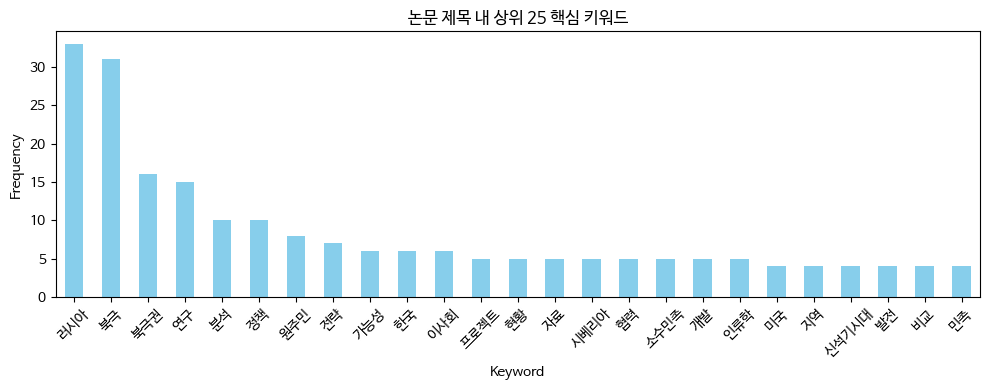

In [ ]:
plt.rc('font', family='NanumBarunGothic')

fig, ax = plt.subplots(figsize=(10, 4))
#plt.figure(figsize=(40, 8))

word_df_title.plot(kind='bar', x='Keyword', y='Frequency', legend=False, color='skyblue', ax=ax)

plt.title('논문 제목 내 상위 25 핵심 키워드')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
desc = df['reserch_desc']
desc.head()

,reserch_desc
0,본 연구는 베링해협 해저터널 프로젝트의 가능성과 한계성을 분석한다. 유라시아와 아메...
1,본 논문은 다음과 같은 문제 제기와 거기에 대한 답변으로 구성되어 있다. \n 서...
2,"이 논문은 2035년까지 러시아의 쇄빙선 인프라 프로젝트의 필요성, 현황 및 평가를..."
3,본 논문의 연구목적은 빠르게 변하고 있는 북극권의 기후환경 변화를 2023년 기후변...
4,본 연구의 목적은 최근 20년간의 시베리아 연바이칼 지역의 신석기시대 고고학 발굴 ...


In [ ]:
# Apply cleaning and tokenization to all article titles
keywords_desc = desc.apply(clean_and_tokenize)
print(keywords_desc)

0     [연구, 베링해협, 해저터널, 프로젝트, 가능성, 한계, 분석, 유라시아, 아메리카...
1     [논문, 다음, 문제, 제기, 거기, 답변, 구성, 서론, 부분, 미국, 국방부, ...
2     [논문, 러시아, 쇄빙선, 인프라, 프로젝트, 필요성, 현황, 평가, 분석, 지구,...
3     [논문, 목적, 북극권, 기후, 환경, 변화, 기후변화, 정부, 협의, 체, 이하,...
4     [연구, 목적, 최근, 시베리아, 바이칼, 지역, 신석기시대, 고고학, 발굴, 연구...
                            ...                        
65    [연구, 핀란드, 외교, 정책, 변화, 과정, 핀란드, 북극, 정책, 향후, 변화,...
66    [이전, 세기, 북극, 국가, 위신, 개인, 도전, 대상, 역할, 냉전, 시기, 자...
67    [러시아, 우크라이나, 사태, 이후, 서방, 제재, 벌써, 서방, 제재, 러시아, ...
68    [한국, 지구온난화, 북극해, 해빙, 가속, 북극, 중요성, 인지, 북극, 이사회,...
69    [연구, 목적, 한반도, 고대, 문화, 형성, 교류, 직, 간접, 영향, 러시아, ...
Name: reserch_desc, Length: 70, dtype: object


In [ ]:
all_keywords_desc =[word for sublist in keywords_desc for word in sublist]
print(all_keywords_desc)

['연구', '베링해협', '해저터널', '프로젝트', '가능성', '한계', '분석', '유라시아', '아메리카', '대륙', '유람', '시아', '꿈', '베링해협', '해저터널', '프로젝트', '인류', '인문학', '상상력', '과학기술', '발전', '궤', '역사', '가지', '프로젝트', '평화', '경제', '통합', '센티', '브', '역할', '담당', '베링해협', '터널', '건설', '또한', '시베리아', '알래스카', '집약', '경제', '발전', '주민', '전제', '조건', '연중', '내내', '물류', '접근', '제공', '운송', '비용', '절감', '제조', '경쟁', '우위', '제공', '베링해협', '프로젝트', '경제', '비경', '제적', '장점', '불구', '프로젝트', '자연', '기술', '정치', '재정', '생태', '도전', '직면', '자연', '조건', '기술', '문제', '과학', '발전', '극복', '국제', '정치', '문제', '재원', '장애', '인도', '러시아', '미국', '실천', '의지', '길', '베링해협', '프로젝트', '인류', '염원', '동시', '진전', '평화로', '귀결', '생태계', '기반', '친환경', '조성', '청색', '성장', '평화', '경제', '프로젝트', '장애', '요인', '중단', '기적', '생각', '역', '발상', '사업', '러미', '간', '세계', '평화', '달성', '세기', '뉴딜', '정책', '정체', '세계', '경제', '활성화', '세계', '경제', '선', '순환', '구조', '발전', '기대', '논문', '다음', '문제', '제기', '거기', '답변', '구성', '서론', '부분', '미국', '국방부', '항행', '자유', '작전', '사상', '기원', '발전', '항해', '자유', '란', '무엇', '해양', '관습법', '국제', '해양법', '항해', '자유'

In [ ]:
word_counts_desc = Counter(all_keywords_desc)
print(word_counts_desc)

Counter({'북극': 311, '러시아': 217, '지역': 159, '개발': 136, '문화': 126, '북극권': 119, '연구': 117, '분석': 85, '정책': 85, '민족': 77, '국가': 68, '전략': 62, '환경': 57, '경제': 56, '국제': 56, '변화': 55, '협력': 54, '자원': 53, '발전': 45, '원주민': 44, '문제': 42, '언어': 42, '북극해': 41, '가능성': 40, '이사회': 40, '과정': 40, '특징': 40, '가장': 37, '관련': 37, '상황': 37, '사회': 37, '프로젝트': 36, '중국': 36, '지속': 35, '대해': 34, '인구': 34, '집단': 34, '시베리아': 33, '미국': 33, '전통': 33, '신석기시대': 32, '현재': 32, '해양': 31, '그린란드': 31, '영향': 31, '소수민족': 30, '북극항로': 28, '안보': 28, '운송': 27, '영토': 27, '가지': 26, '또한': 26, '접근': 26, '해상': 26, '점': 26, '보존': 26, '한국인': 26, '물류': 25, '정부': 25, '국': 25, '진행': 25, '치아': 25, '유적': 25, '정치': 24, '논문': 24, '군사': 24, '간의': 24, '갈등': 24, '공간': 24, '기후변화': 23, '중요성': 23, '자료': 23, '비교': 23, '역할': 22, '정체': 22, '목적': 22, '함': 22, '결과': 22, '세계': 21, '활동': 21, '핵심': 21, '관계': 21, '삶': 21, '매우': 20, '방식': 20, '방법': 20, '입장': 20, '역사': 19, '건설': 19, '외교': 19, '결론': 19, '양상': 19, '시대': 19, '이용': 19, '활용': 19, '우크라이나': 19, '한

In [ ]:
common_words_desc = word_counts_desc.most_common(25)
print(common_words_desc)

[('북극', 311), ('러시아', 217), ('지역', 159), ('개발', 136), ('문화', 126), ('북극권', 119), ('연구', 117), ('분석', 85), ('정책', 85), ('민족', 77), ('국가', 68), ('전략', 62), ('환경', 57), ('경제', 56), ('국제', 56), ('변화', 55), ('협력', 54), ('자원', 53), ('발전', 45), ('원주민', 44), ('문제', 42), ('언어', 42), ('북극해', 41), ('가능성', 40), ('이사회', 40)]


In [ ]:
# Create a DataFrame for easy visualization
word_df = pd.DataFrame(common_words_desc, columns=['Keyword', 'Frequency'])
word_df

,Keyword,Frequency
0,북극,311
1,러시아,217
2,지역,159
3,개발,136
4,문화,126
5,북극권,119
6,연구,117
7,분석,85
8,정책,85
9,민족,77


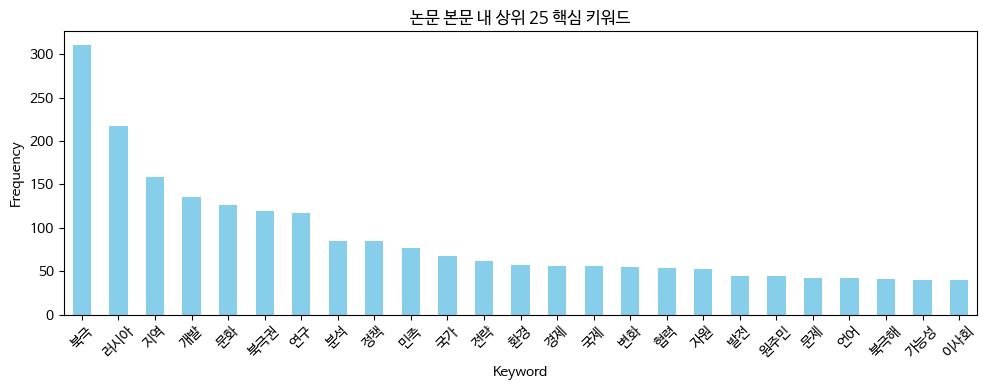

In [ ]:
plt.rc('font', family='NanumBarunGothic')

fig, ax = plt.subplots(figsize=(10, 4))

word_df.plot(kind='bar', x='Keyword', y='Frequency', legend=False, color='skyblue', ax=ax)

plt.title('논문 본문 내 상위 25 핵심 키워드')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

How many times the specific word appears

In [ ]:
pip install openai

In [ ]:
from openai import OpenAI

client = OpenAI(api_key="-------")


def get_response(text):
    prompt = f"Please provide a concise summary of the following research paper description in korean language:\n\n{text}"
    response = client.chat.completions.create(
        model="gpt-4",
        messages=[{"role": "user", "content": text}]
    )
    return response.choices[0].message.content

# Apply to your DataFrame column
df['openai_reply'] = df['reserch_desc'].apply(get_response)

print(df[['reserch_desc', 'openai_reply']])


                                         reserch_desc  \
0   본 연구는 베링해협 해저터널 프로젝트의 가능성과 한계성을 분석한다. 유라시아와 아메...   
1   본 논문은 다음과 같은 문제 제기와 거기에 대한 답변으로 구성되어 있다. \n  서...   
2   이 논문은 2035년까지 러시아의 쇄빙선 인프라 프로젝트의 필요성, 현황 및 평가를...   
3   본 논문의 연구목적은 빠르게 변하고 있는 북극권의 기후환경 변화를 2023년 기후변...   
4   본 연구의 목적은 최근 20년간의 시베리아 연바이칼 지역의 신석기시대 고고학 발굴 ...   
..                                                ...   
65  본 연구는 핀란드의 외교정책 변화와 이 과정에서 핀란드 북극정책이 향후 어떻게 변화...   
66  이전 세기의 북극은 국가의 위신이나 개인의 도전 대상으로서 역할을 해왔으며, 냉전시...   
67  러시아는 2014년 우크라이나 사태 이후 서방의 경제제재가 벌써 7년째 이어지고 있...   
68  한국은 지구온난화로 인한 북극해의 해빙이 가속화되자 북극의 중요성을 인지하고 북극이...   
69  본 연구의 목적은 한반도 고대문화 형성과 교류에 직·간접적 영향을 끼친 러시아 연해...   

                                         openai_reply  
0   추가적으로, 이 프로젝트는 지구의 끝이라 할 수 있는 한적한 지역에 새로운 기회를 ...  
1   This paper consists of the following problem s...  
2   This paper analyses the necessity, status, and...  
3   본 논문은 이런 내용을 전반적으로 검토하고 북극권 기후변화 대응 전략의 효과적인 구...  
4   본 연구는 최근 20년간의 시베리아 연바이칼 지역에서의 

In [ ]:
print(df['openai_reply'][3])

본 논문은 이런 내용을 전반적으로 검토하고 북극권 기후변화 대응 전략의 효과적인 구현방안을 제시하면서, 미래의 변화에 대비한 기후 환경 정책의 방향성을 제안한다. 이를 통해 장기적으로 기후변화에 적응하고 그에 대응하는 방안을 마련함으로써 인류 정신을 바탕으로 한 우리 세대와 이후 세대들의 오랫동안의 삶의 질 매개를 고민하고 있다.

미래에 대비한 기후 환경 정책의 방향성을 잘 모델링하기 위해, 이 논문은 현재 북극권 기후 변화의 문제와 그 과제를 깊이 이해하고자 한다. 북극이사회의 역할과 중요성, 그리고 북극권의 특성과 관련된 기후 변화에 대한 정책과 계획을 제시하는데 도움을 주기 위하여. 이를 통해 이 논문은 북극권 기후 변화에 관련된 지정학적 과제를 해결하는데 크게 기여하고자 한다. 

최종적으로, 본 논문은 북극이사회 회원국들의 기후변화 대응에 대한 심도 있는 연구를 제공함으로써 기후변화 문제의 현실적이고 실효성 있는 해결책을 제시하며, 우리 모두에게 지속 가능한 미래를 약속한다. 이 연구가 북극이사회 회원국들에게 뿐만 아니라, 모든 기후변화 행동에 참여하는 모든 이에게 도움이 되길 바란다.


Another way

In [ ]:
pip install krwordrank

In [ ]:
file_path = '/content/drive/MyDrive/data_analysis_dataset/research_papers.csv'

df = pd.read_csv(file_path, quotechar='"', on_bad_lines='skip')

In [ ]:
import pandas as pd
from krwordrank.sentence import summarize_with_sentences

# 원래 데이터를 로드
desc = df['reserch_desc'].tolist()  # Series -> list로 변경
stopwords = {'이에','하는','새로운','가능','대해','또한','가장','있어','것이다.','이러한','특히','그러나','그리고','따라','위한','한다.','것으로','있는','있다.','등','관','중심','대한','전','최초','용','더','층','위','개','통해','호','첫','인','제외','두','다시','및','중','인한','위해','의','와의','이','그','저','것','수','들','은','는','가','을','를','에','에서','와','과','도','으로','로','가','를','에'}

# 핵심 문장 추출
penalty = lambda x: 0 if (25 <= len(x) <= 80) else 1
diversity = 0.5

keywords, sents = summarize_with_sentences(
    desc,
    penalty=penalty,
    stopwords=stopwords,
    diversity=diversity,
    num_keywords=200,
    num_keysents=5,  # 핵심 문장을 5개 추출
    verbose=False
)

# 결과 출력
print("\n[ 추출된 핵심 문장 ]")
for idx, sent in enumerate(sents, 1):
    print(f"{idx}. {sent}")

# 핵심 키워드도 보고 싶다면:
print("\n[ 핵심 키워드 ]")
for word, score in sorted(keywords.items(), key=lambda x: -x[1])[:20]:
    print(f"{word}: {score:.4f}")



[ 추출된 핵심 문장 ]
1. 최근 기후변화로 북극지역의 자원개발과 북극항로 상용화 가능성이 커지면서 이 지역의 잠재력에 국제사회의 이목이 집중되고 있다. 영토의 북부지역 대부분이 북극권에 속하는 러시아는 비록 1990년대에는 경제위기로 큰 관심을 기울이지 못했으나, 2000년대 급속한 경제성장에 힘입어 북극개발에 다시 서서히 눈을 돌리게 되었으며 「러시아 연방 북극권 개발 전략」을 공포하여 「북극정책 2020」을 기반으로 분야별 실천 과제 등을 구체적으로 제시하며 북극 정책을 추진하게 되었다.
러시아 정부 입장에서는 북극에 대한 정책이 실질적인 성과를 달성하기 위해서는 자국민에 대한 정책 이해와 협조 획득이 매우 중요하다. 이를 위해 국영 통신사를 통해 러시아 정부가 원하는 북극 정책에 대한 좋은 이미지를 국민에게 심어주는 것이 필요하다. 이러한 러시아 정부의 북극에 대한 정책 및 실행 의지가 반영된 국영 통신사의 보도 내용을 고찰함으로써, 북극 정책의 내용 및 실행 과정, 보도 경향을 파악하고자 한다.
뉴스는 정치-사회적 이슈를 반영하는 중요한 채널이다. 뉴스 기사 텍스트를 분석하는 것은 정치-사회적 이슈를 이해하는 데 많은 도움이 된다. 본 연구에서는 대량의 ‘타스 통신사’ 뉴스 텍스트로부터 데이터를 추출하여 주요 사건을 감지하고, 사건 간의 관련성을 파악하여 사건 네트워크를 구축함으로써 요약된 사건정보를 제공하는 기법을 사용한다. 또한 텍스트 분석기법과 연관분석 기법을 활용해 비정형 뉴스 텍스트를 정형화하여 정치-사회적 이슈를 시스템적으로 분석하고자 한다.
‘타스 통신사’ 뉴스 기사 텍스트 분석을 위해 뉴스 기사 본문 분석 및 기사 제목 분석으로 나누어 고찰하였다. 뉴스 기사 본문 분석에서 단어 빈도수(워드클라우드 제시) 분석, 단어 간의 네트워크 분석을 실시하였다. 엔그램(n-gram) 분석에서는 바이그램 분석 및 트라이그램 분석 방법을 사용, 더욱 세밀한 연구를 시도하였다. 이러한 연구에서 도출된 키워드를 가지고 뉴스 본문을 요약·함축하는 기사 제

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 740.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment"
)

results = []
for sent in sents:
    result = sentiment_pipeline(sent[:512])[0]  # 512 자로 자르기
    results.append({"sentence": sent[:512], "label": result["label"], "score": result["score"]})

print("\n[ 감정 분석 결과 ]")
for idx, res in enumerate(results, 1):
    print(f"{idx}. 문장: {res['sentence']}")
    print(f"   감정: {res['label']}, 점수: {res['score']:.4f}")

Device set to use cpu



[ 감정 분석 결과 ]
1. 문장: 최근 기후변화로 북극지역의 자원개발과 북극항로 상용화 가능성이 커지면서 이 지역의 잠재력에 국제사회의 이목이 집중되고 있다. 영토의 북부지역 대부분이 북극권에 속하는 러시아는 비록 1990년대에는 경제위기로 큰 관심을 기울이지 못했으나, 2000년대 급속한 경제성장에 힘입어 북극개발에 다시 서서히 눈을 돌리게 되었으며 「러시아 연방 북극권 개발 전략」을 공포하여 「북극정책 2020」을 기반으로 분야별 실천 과제 등을 구체적으로 제시하며 북극 정책을 추진하게 되었다.
러시아 정부 입장에서는 북극에 대한 정책이 실질적인 성과를 달성하기 위해서는 자국민에 대한 정책 이해와 협조 획득이 매우 중요하다. 이를 위해 국영 통신사를 통해 러시아 정부가 원하는 북극 정책에 대한 좋은 이미지를 국민에게 심어주는 것이 필요하다. 이러한 러시아 정부의 북극에 대한 정책 및 실행 의지가 반영된 국영 통신사의 보도 내용을 고찰함으로써, 북극 정책의 내용 및 실행 과정, 보도 경향을 파악하고자 한다.
뉴스는 정치-사회적 이슈를 
   감정: 4 stars, 점수: 0.4142
2. 문장: 러시아의 북극은 지구상 그 어떤 지역보다 다양한 토착민족들이 오랜 세월 삶의 영역을 이어나가고 있는 장소이다. 북극의 토착민족들은 자신들만의 경제활동, 관습, 독특한 문화, 혹독한 기후를 이겨내며 자연과 조화롭게 살아가는 삶의 방식을 통해 살아왔고 살아가고 있다. 그러나 현재 북극권 원주민들은 북극의 기후변화로 인한 직접적인 타격 뿐 만 아니라 자원과 영토의 개발, 이주민 문제, 새로운 문화와의 융화라는 문제 속에서 환경의 훼손과 자신의 땅을 활용하면서 이익의 분배에서는 소외되는데서 오는 상실감, 민족 언어 및 전통문화의 소멸·해체문제, 법률적 보호의 미비 등 다양한 문제를 겪고 있다.
인간의 거주공간으로써 북극을 바라보는 시점은 생물적 다양성을 보존하고자 하는 것과 유사하게 문화적 다양성을 보존하는 것이, 지난 세기보다 오히려 더 복잡하고 예측 불가능한 다양성 